<a href="https://colab.research.google.com/github/AnchitSharma/tensorflow-for-deep-learning-with-python/blob/master/tensorflow_MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [5]:
path = f"/content/gdrive/My Drive/datasets/MNIST_data/"

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets(train_dir=path, one_hot=True)

In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [12]:
mnist.validation.num_examples

5000

## visualizing the data

In [13]:
import matplotlib.pyplot as plt

In [14]:
mnist.train.images[0].shape

(784,)

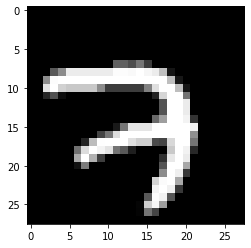

In [18]:
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap="gist_gray")

In [21]:
# mnist.train.images[1].max()
mnist.train.images[0].min()

0.0

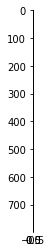

In [23]:
plt.imshow(mnist.train.images[0].reshape(784, 1))

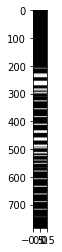

In [26]:
plt.imshow(mnist.train.images[0].reshape(784, 1), cmap="gist_gray", aspect=0.02)

# create the model

In [33]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [34]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784, 10]))

In [35]:
b = tf.Variable(tf.zeros([10]))

In [36]:
# create a Graph
y = tf.matmul(x, W) + b

Loss and Optimizer

In [37]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [39]:
# cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

Create Session

In [42]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
  sess.run(init)

  # Train the model for 1000 steps on the training set
  # Using built in batch feeder from mnist for convenience


  for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y})

  # Test the train model
  matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))

  acc = tf.reduce_mean(tf.cast(matches, tf.float32))

  print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9156
